In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch, torchvision
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [6]:
#Reading the data file - "UkrainianConflict" Reddit Top Comments/Posts
data_path ="/content/drive/MyDrive/SMP-STEP5/archive/Ukrainian_Conflict_Subreddit_Top_Comments.csv"
data_file =pd.read_csv(data_path , dtype = 'str',index_col = False , header =0)
data_file.head()

,Unnamed: 0,title,score,id,url,comms_num,created,body,timestamp
0,0,[NSFW] New York Times Cover: Russia kills flee...,72584,t855du,https://static01.nyt.com/images/2022/03/06/wor...,4291,1646591719.0,NaN,2022-03-06 13:35:19
1,1,Ukrainians have decided to flood parts around ...,50154,t7rf3v,https://www.reddit.com/gallery/t7rf3v,1373,1646542575.0,NaN,2022-03-05 23:56:15
2,2,Ukrainian army is searching for a column of Ru...,45854,t2lv7x,https://twitter.com/EuromaidanPress/status/149...,1794,1645959500.0,NaN,2022-02-27 05:58:20
3,3,Swedish Member of Parliament nominates Zelensk...,45525,t3r06r,https://www.aftonbladet.se/nyheter/a/66g6vQ/ad...,944,1646085175.0,NaN,2022-02-28 16:52:55
4,4,Putin ‘sacks eight generals’ in anger at slow ...,42575,tb2f86,https://metro.co.uk/2022/03/10/ukraine-invasio...,2879,1646929534.0,NaN,2022-03-10 11:25:34


In [7]:
'''#Dividing dataframe in 3 time frames 2022-02-16 to 2022-03-13
df_1 = sort_datafile[(sort_datafile['timestamp'] >= "2022-02-16") & (sort_datafile['timestamp'] <= "2022-02-23")]  #t1
df_2 = sort_datafile[(sort_datafile['timestamp'] >= "2022-02-24") & (sort_datafile['timestamp'] <= "2022-03-03")]  #t2
df_3 = sort_datafile[(sort_datafile['timestamp'] >= "2022-03-04") & (sort_datafile['timestamp'] <= "2022-03-13")]  #t3
print("Shape of new dataframes - {} , {},{}".format(df_1.shape, df_2.shape,df_3.shape))'''

'#Dividing dataframe in 3 time frames 2022-02-16 to 2022-03-13\ndf_1 = sort_datafile[(sort_datafile[\'timestamp\'] >= "2022-02-16") & (sort_datafile[\'timestamp\'] <= "2022-02-23")]  #t1\ndf_2 = sort_datafile[(sort_datafile[\'timestamp\'] >= "2022-02-24") & (sort_datafile[\'timestamp\'] <= "2022-03-03")]  #t2\ndf_3 = sort_datafile[(sort_datafile[\'timestamp\'] >= "2022-03-04") & (sort_datafile[\'timestamp\'] <= "2022-03-13")]  #t3\nprint("Shape of new dataframes - {} , {},{}".format(df_1.shape, df_2.shape,df_3.shape))'

In [8]:
#Splitting the datasource for quality analysis
sort_datafile = data_file.sort_values("timestamp")
df_1 = sort_datafile.iloc[:500,:]  #t1
df_2 = sort_datafile.iloc[501:1200,:]  #t2
df_3 = sort_datafile.iloc[1201:,:]  #t3
print("Shape of new dataframes - {} , {},{}".format(df_1.shape, df_2.shape,df_3.shape))
print(len(sort_datafile))

df_12 = df_1.append(df_2)
df_123 = df_12.append(df_3)

Shape of new dataframes - (500, 9) , (699, 9),(725, 9)
1926


In [10]:
def veracity(datafile):
  #Accuracy

  #Pj - number of duplicate elements
  p1 = len(datafile[datafile.duplicated()])  #number of duplicate elements in dataset in Timeframe
  lbd = len(datafile)
  Hmax = math.log2(lbd) 
  print("Hmax - ",Hmax)
  if (p1 == 0):
    term1 = 0
  else:
      term1 = p1 * math.log2(p1)
  Hacc = Hmax - ((1/lbd) * (term1))
  print("Hacc - ",Hacc)
  Accuracy = Hacc / Hmax
  print("Accuracy - ", Accuracy)

  # Completeness
  no_null_value = datafile.dropna()
  Completeness = len(no_null_value) / lbd
  print("no_null_value - ", len(no_null_value))
  print("Completeness - ", Completeness)

  # Currentness
  # range = records from 24th february 2022 to present day
  recc_acc_age = datafile[(datafile['timestamp'] >= "2022-02-24")]
  Currentness = len(recc_acc_age) / lbd
  print("recc_acc_age - ", len(recc_acc_age))
  print("Currentness - ", Currentness)

  # Availability
  # requests - API requesting to retrieve data having url of the format 'https://'
  #successfull_req = datafile[(datafile['score'].astype(int) > 0)]
  successfull_req = datafile[datafile.url.str.startswith('https://', na=False)]
  num_successfull_req = len(successfull_req)
  print("num_successfull_req - ", num_successfull_req)
  num_of_requests = len(datafile)
  print("num_of_requests - ", num_of_requests)
  Availability = num_successfull_req / num_of_requests
  print("Availability - ", Availability)

  Veracity = Accuracy * (1/4) + Completeness * (1/4) + Currentness * (1/4) + Availability * (1/4)

  print("Veracity - ", Veracity)
  return Veracity
ver_t1 = veracity(df_1)
print("-----------------------------------")
ver_t2 = veracity(df_2)
print("-----------------------------------")
ver_t3 = veracity(df_3)

Hmax -  8.965784284662087
Hacc -  8.965784284662087
Accuracy -  1.0
no_null_value -  10
Completeness -  0.02
recc_acc_age -  487
Currentness -  0.974
num_successfull_req -  498
num_of_requests -  500
Availability -  0.996
Veracity -  0.7475
-----------------------------------
Hmax -  9.449148645375436
Hacc -  9.449148645375436
Accuracy -  1.0
no_null_value -  1
Completeness -  0.001430615164520744
recc_acc_age -  699
Currentness -  1.0
num_successfull_req -  496
num_of_requests -  699
Availability -  0.709585121602289
Veracity -  0.6777539341917025
-----------------------------------
Hmax -  9.501837184902296
Hacc -  9.501837184902296
Accuracy -  1.0
no_null_value -  0
Completeness -  0.0
recc_acc_age -  725
Currentness -  1.0
num_successfull_req -  0
num_of_requests -  725
Availability -  0.0
Veracity -  0.5


In [12]:
# 3 Vs of Big Data
import re
import string
from string import punctuation
Nds = 1
def validity(datafile):
  lbd = len(datafile) #length of big data
  print(lbd)
  #Credibility
  #Presuming that the dataset given is credible
  Nds_cr = 1  #number of credible datasets
  Credibility = Nds_cr / Nds
  print("Credibility - ",Credibility)

  
  #Compliance
  #compliant records - records having body starting with a special character
  '''  datafile['a'] = datafile.body.str[0]
  rec= datafile[datafile.a.str.contains(r'[A-Za-z0-9]' , na= True)]
  datafile = datafile.drop(columns=['a'])'''
  #datafile['body'].fillna("", inplace = True)
  def func(x):
    if type(x) == str and len(x) > 0:
        start = x[0]
        if not start.isalnum() :
            return False
        return True            
    else:
        return True
  rec = datafile[datafile['body'].apply(lambda x: func(x))]
  Nrec_comp = len(rec)
  print("Nrec_comp - ", Nrec_comp)
  DS_comp = Nrec_comp / lbd 
  Compliance = DS_comp / Nds
  print("Compliance - ",Compliance)

  Validity = Credibility * (1/2) + Compliance * (1/2)
  print("Validity - ",Validity)
  print(len(rec))

  #print(rec)
  #print (datafile.body.str[0])


  return Validity
val_t1 = validity(df_123)
print("-----------------------------------")
val_t2 = validity(df_12)
print("-----------------------------------")
val_t3 = validity(df_1)



1924
Credibility -  1.0
Nrec_comp -  1870
Compliance -  0.9719334719334719
Validity -  0.9859667359667359
1870
-----------------------------------
1199
Credibility -  1.0
Nrec_comp -  1188
Compliance -  0.9908256880733946
Validity -  0.9954128440366973
1188
-----------------------------------
500
Credibility -  1.0
Nrec_comp -  498
Compliance -  0.996
Validity -  0.998
498


In [13]:
def vincularity(datafile):
  nds = 1
  ldst = len(datafile) #length of dataset
  #Traceability - title is not comment and body is not null
  Rec_trace =  datafile[(datafile['title'] != "Comment") & (datafile['body'].isna() == False) ]
  Traceability =  len(Rec_trace) / ldst
  print("Rec_trace - ", len(Rec_trace))
  print("Traceability - ",Traceability)

  Vincularity = Traceability / Nds
  print("Vincularity - ",Vincularity)
  return Vincularity


vin_t1 = vincularity(df_1)
print("-----------------------------------")
vin_t2 = vincularity(df_12)
print("-----------------------------------")
vin_t3 = vincularity(df_123)

Rec_trace -  10
Traceability -  0.02
Vincularity -  0.02
-----------------------------------
Rec_trace -  11
Traceability -  0.009174311926605505
Vincularity -  0.009174311926605505
-----------------------------------
Rec_trace -  11
Traceability -  0.005717255717255718
Vincularity -  0.005717255717255718


In [14]:
sort_datafile.columns

Index(['Unnamed: 0', 'title', 'score', 'id', 'url', 'comms_num', 'created',
       'body', 'timestamp'],
      dtype='object')

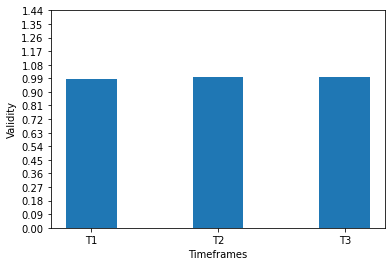

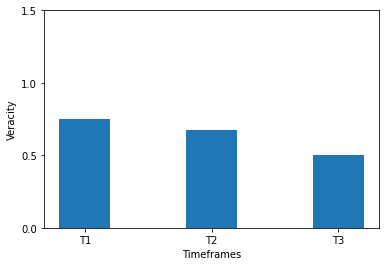

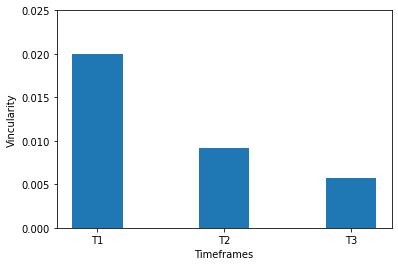

In [15]:
#Mapping on pyplot

#Validity
plt.bar(['T1','T2','T3'] ,[val_t1, val_t2, val_t3] , width = 0.4 )
plt.yticks(np.arange(0.0,1.5,step = 0.09))
plt.ylabel('Validity')
plt.xlabel('Timeframes')
plt.show()

#Veracity
plt.bar(['T1','T2','T3'] ,[ver_t1, ver_t2, ver_t3] , width = 0.4 )
plt.yticks(np.arange(0.0,2.0,step = 0.5))
plt.ylabel('Veracity')
plt.xlabel('Timeframes')
plt.show()

#Vincularity
plt.bar(['T1','T2','T3'] ,[vin_t1, vin_t2, vin_t3], width = 0.4  )
plt.yticks(np.arange(0.0, 0.03 , step = 0.005 ))
plt.ylabel('Vincularity')
plt.xlabel('Timeframes')
plt.show()

In [16]:
data_file['timestamp'] = pd.to_datetime(data_file['timestamp'])
new_sort_datafile = data_file
#.sort_values('timestamp')

print(len(new_sort_datafile))
#Cleaning of the data

# 1. Cleaning special characters

spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    new_sort_datafile['title'] = new_sort_datafile['title'].str.replace(char, ' ')
    new_sort_datafile['body'] = new_sort_datafile['body'].str.replace(char, '')


print(len(new_sort_datafile))


1926
1926


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app.launch_new_instance()


In [17]:
# 2. Removing null values
new_sort_datafile["body"] = sort_datafile["body"].fillna("Title = Comment")
#new_sort_datafile = sort_datafile.dropna(subset = ["url"])

In [18]:
# 3. created > 0 

#new_sort_datafile = new_sort_datafile[(sort_datafile['score'].astype(int) >= 0)]
new_sort_datafile = new_sort_datafile[(sort_datafile['created'].astype(float) >= 1646988350.80)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [19]:
print(len(new_sort_datafile))

1014


In [20]:
#dividing into time frames
#Data Extraction
new_df_1 = new_sort_datafile.iloc[:400,:]  #t1
new_df_2 = new_sort_datafile.iloc[401:1000,:]  #t2
new_df_3 = new_sort_datafile.iloc[1001:,:]  #t3
print("Shape of new dataframes - {} , {},{}".format(new_df_1.shape, new_df_2.shape,new_df_3.shape))
print(len(new_sort_datafile))

new_df_12 = new_df_1.append(new_df_2)
new_df_123 = new_df_12.append(new_df_3)

Shape of new dataframes - (400, 9) , (599, 9),(13, 9)
1014


400
Credibility -  1.0
Nrec_comp -  383
Compliance -  0.9575
Validity -  0.97875
383
-----------------------------------
999
Credibility -  1.0
Nrec_comp -  948
Compliance -  0.948948948948949
Validity -  0.9744744744744744
948
-----------------------------------
1012
Credibility -  1.0
Nrec_comp -  960
Compliance -  0.9486166007905138
Validity -  0.9743083003952568
960


Hmax -  8.643856189774725
Hacc -  8.643856189774725
Accuracy -  1.0
no_null_value -  86
Completeness -  0.215
recc_acc_age -  400
Currentness -  1.0
num_successfull_req -  86
num_of_requests -  400
Availability -  0.215
Veracity -  0.6074999999999999
-----------------------------------
Hmax -  9.226412192788786
Hacc -  9.226412192788786
Accuracy -  1.0
no_null_value -  0
Completeness -  0.0
recc_acc_age -  599
Currentness -  1.0
num_successfull_req -  0
num_of_requests -  599
Availability -  0.0
Veracity -  0.5
-----------------------------------
Hmax -  3.700439718141092
Hacc -  3.700439718141092
Accuracy -  1.0
no_n

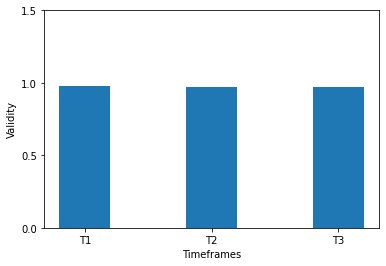

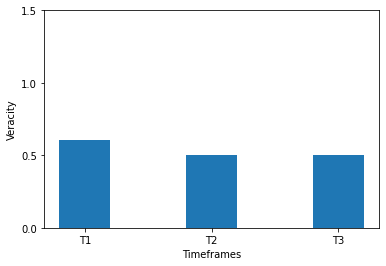

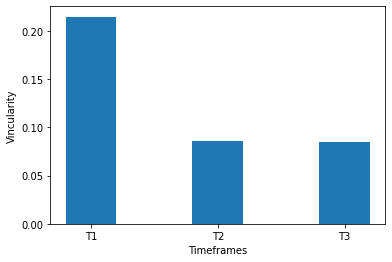

In [21]:
new_val_t1 = validity(new_df_1)
print("-----------------------------------")
new_val_t2 = validity(new_df_12)
print("-----------------------------------")
new_val_t3 = validity(new_df_123)
print("\n")

new_ver_t1 = veracity(new_df_1)
print("-----------------------------------")
new_ver_t2 = veracity(new_df_2)
print("-----------------------------------")
new_ver_t3 = veracity(new_df_3)
print("\n")

new_vin_t1 = vincularity(new_df_1)
print("-----------------------------------")
new_vin_t2 = vincularity(new_df_12)
print("-----------------------------------")
new_vin_t3 = vincularity(new_df_123)


#Validity
plt.bar(['T1','T2','T3'] ,[new_val_t1, new_val_t2, new_val_t3] , width = 0.4 )
plt.yticks(np.arange(0.0,2.0,step = 0.5))
plt.ylabel('Validity')
plt.xlabel('Timeframes')
plt.show()

#Veracity
plt.bar(['T1','T2','T3'] ,[new_ver_t1, new_ver_t2, new_ver_t3] , width = 0.4 )
plt.yticks(np.arange(0.0,2.0,step = 0.5))
plt.ylabel('Veracity')
plt.xlabel('Timeframes')
plt.show()

#Vincularity
plt.bar(['T1','T2','T3'] ,[new_vin_t1, new_vin_t2, new_vin_t3], width = 0.4  )
plt.yticks(np.arange(0.0,0.25 , step = 0.05))
plt.ylabel('Vincularity')
plt.xlabel('Timeframes')
plt.show()